## Long Island Hedonic Analysis - Draft
### Visualizing the data
#### created by Doug Patton
<br>
If you run the notebook with matplotlib widgets turned on (and installed), you can rotate and zoom in on the 3d plots. 

In [1]:
import island
from datetime import date

In [2]:
#from importlib import reload  
#reload(island)

In [3]:
%matplotlib inline
#may be necessary to display plots inline on some systems
#%pylab #interactive graphs in external window
#%matplotlib widget #makes graphs interactive inline

In [4]:
idata_obj=island.IslandData(dpi=200)

In [5]:
TSHistvarlist=[
            'sale_year',
            'saleprice',
            'assessedvalue',
            'secchi',
            'wateraccess',
            'bayfront',
            'waterhouse',
            'shorelinedistance',
            'distance_shoreline',
            'saleacres',
            ]

In [6]:
#idata_obj.getDataFromCSV()

In [7]:
#idata_obj.doCSVToDict()

In [8]:
idata_obj.makeTimeListArrayList()

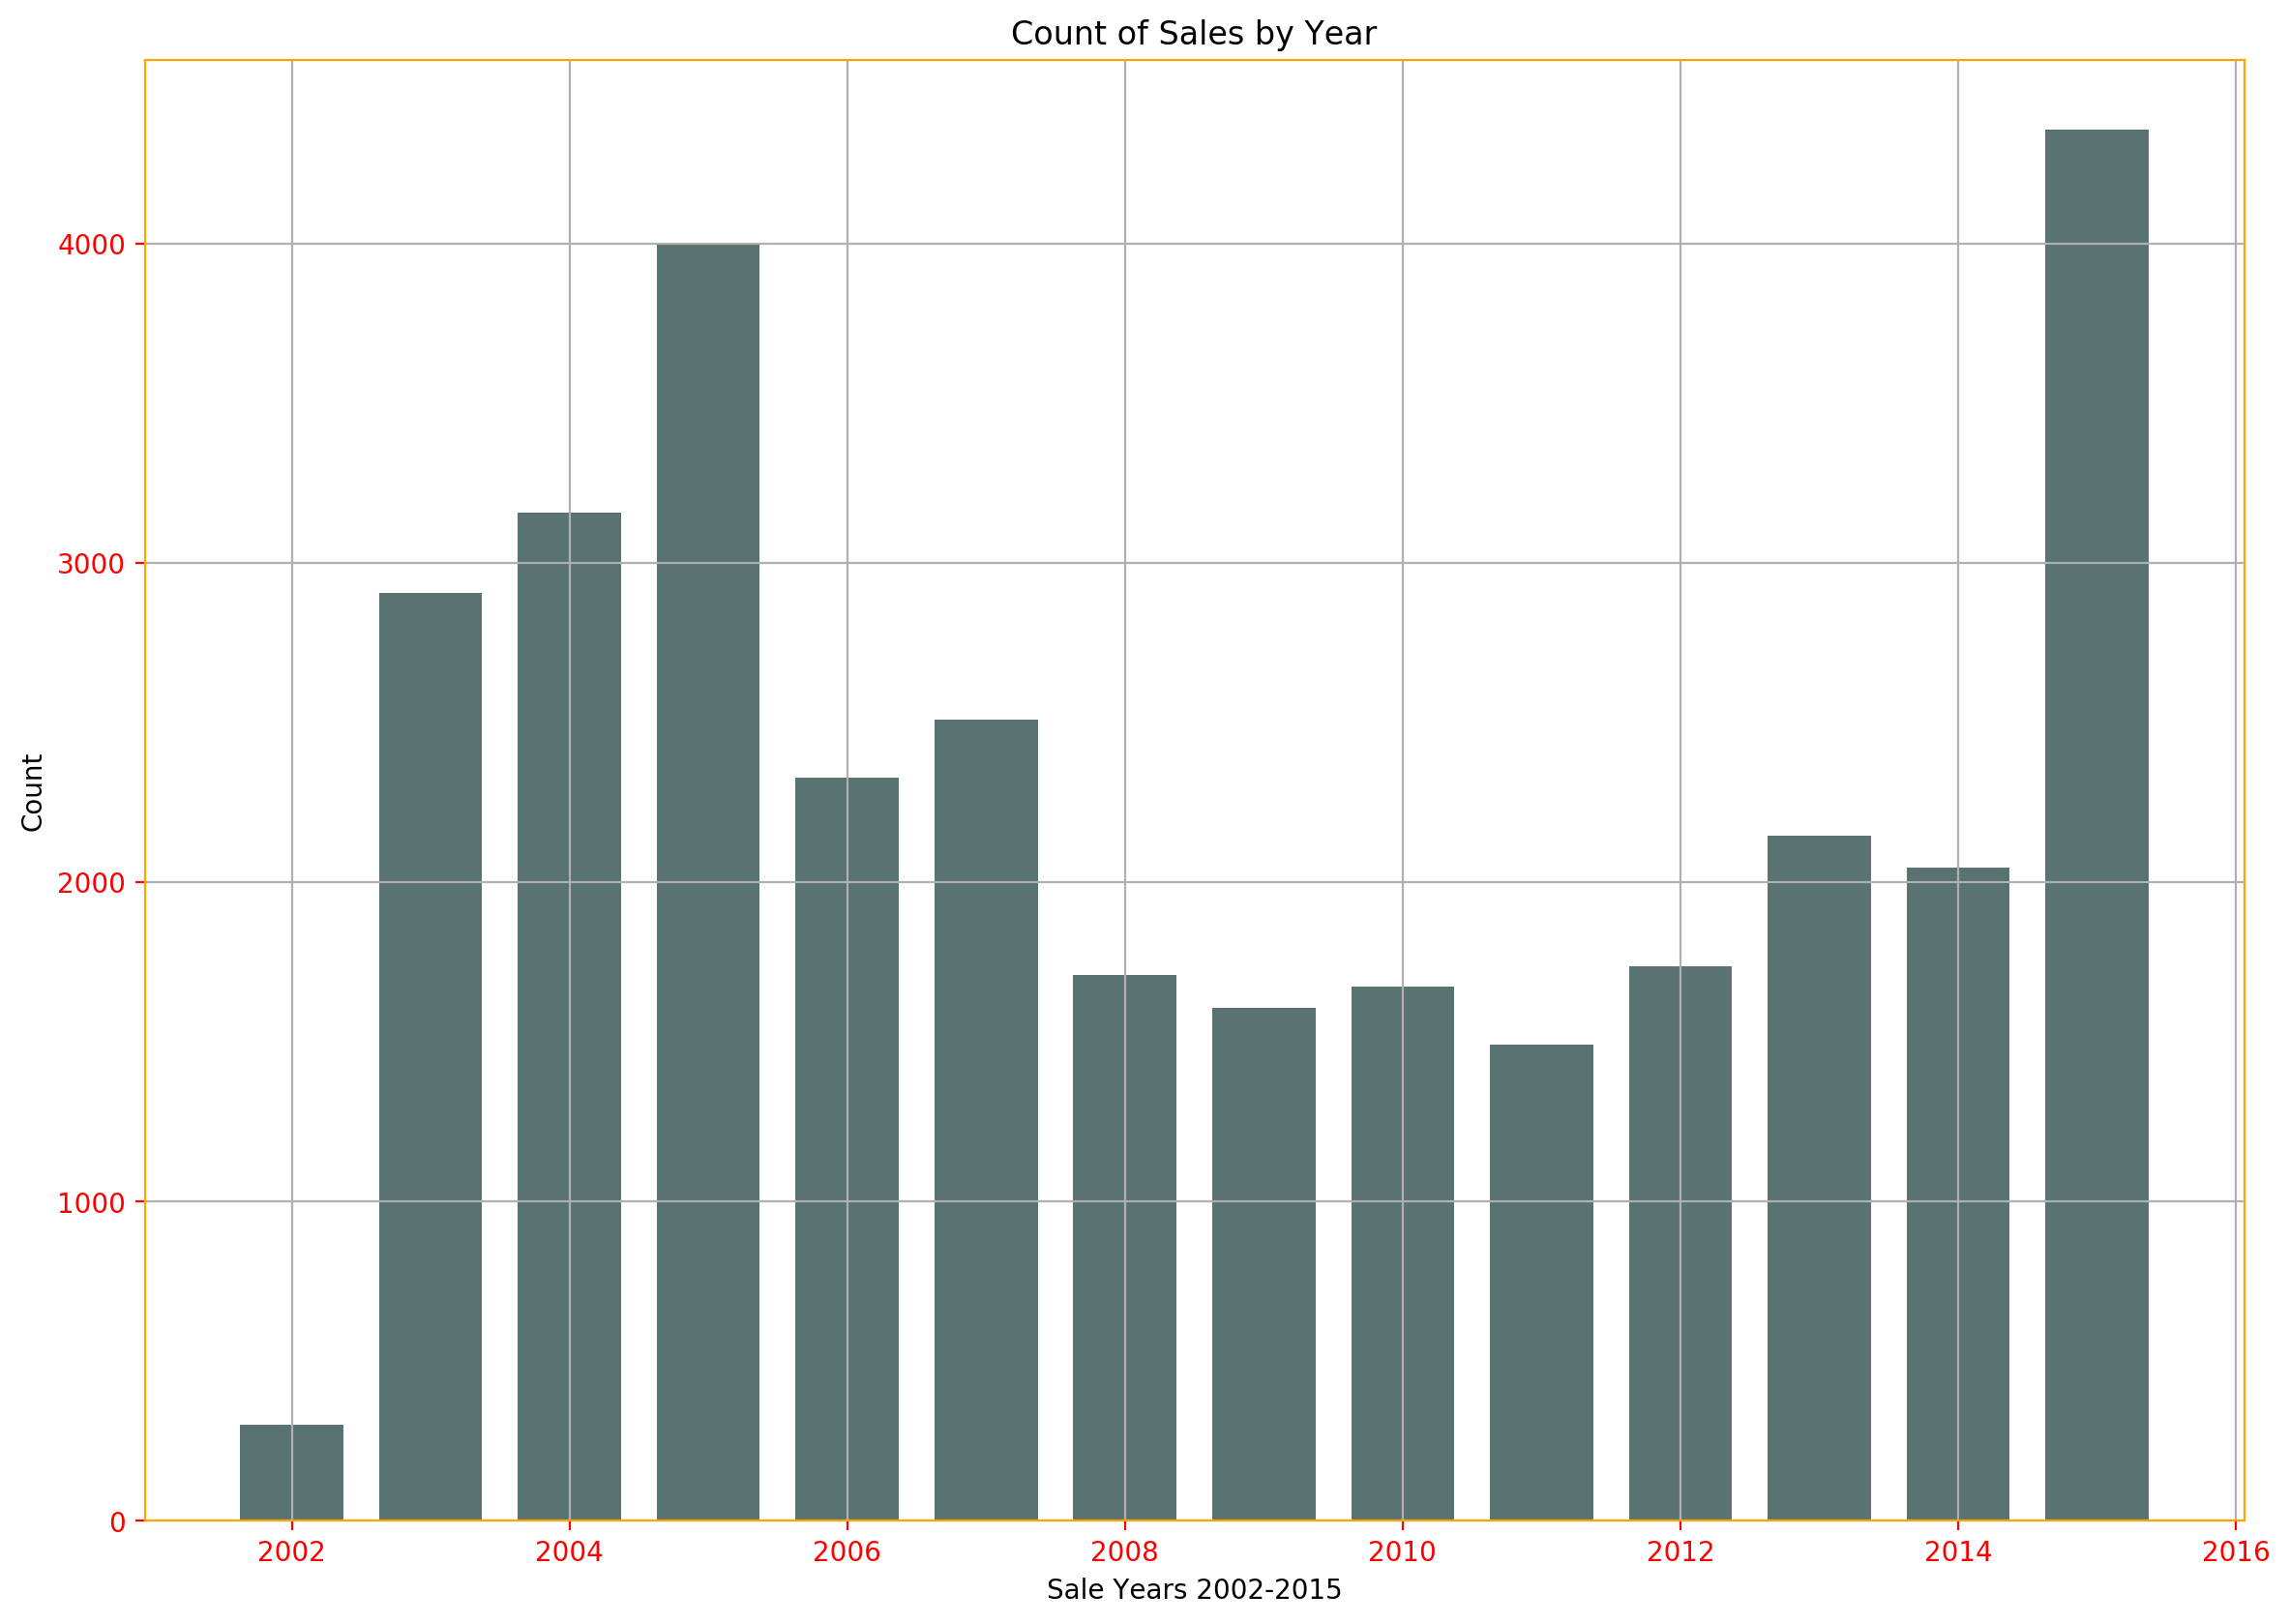

In [9]:
idata_obj.make2dHistogram()

# Data
## sample size (sales volume) over time

- Observations: 
   - The volume of real estate transactions matches the broader economy and is perhaps a leading (rather than trailing) economic indicator
   - 2005 and 2015 seem to have quite a bit in common. It would be interesting to just compare data for those 2 years.
   - 2002 must be incomplete, any year dummies for that year might be biased if incompleteness not random. don't use 2002 as the excluded dummy
   
   \pagebreak
   
   

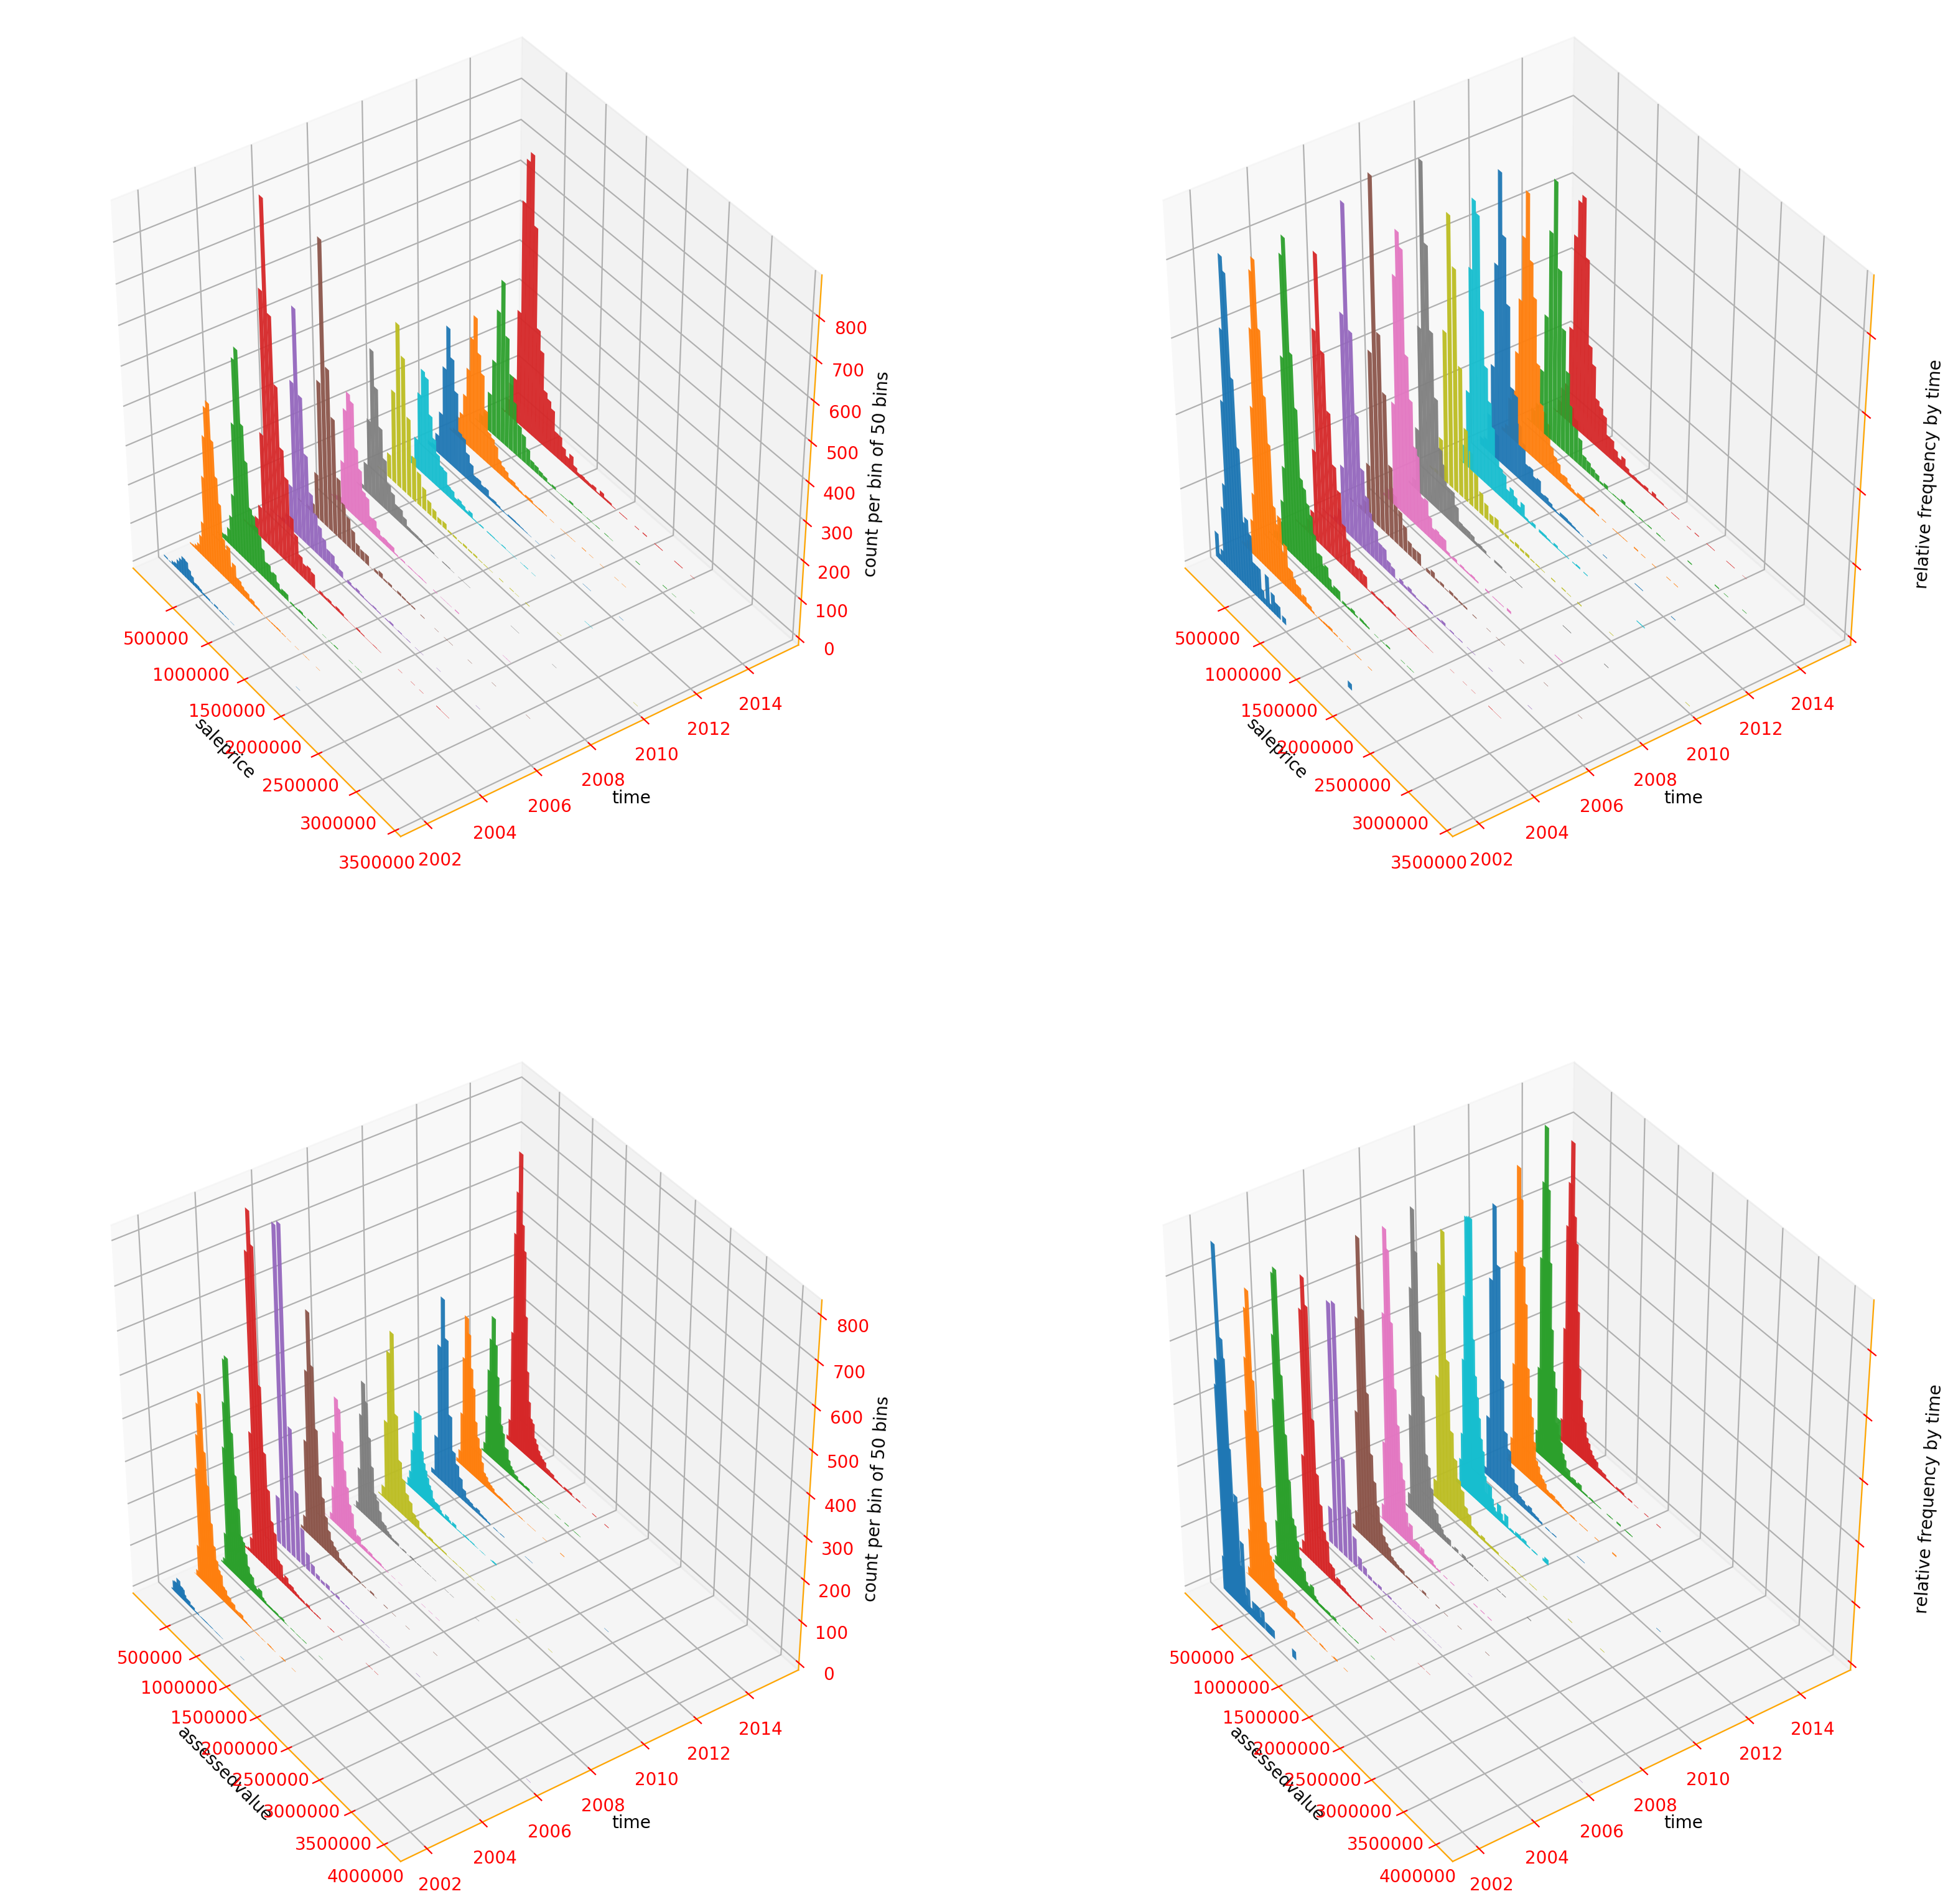

In [10]:
idata_obj.makeTSHistogram(varlist=TSHistvarlist[1:3])

## time series histograms
***Zoom in to see detail***

### dollar values
#### for this graph and the graphs below:

the graph on the left is a regular histogram and height of the bars is the count of items in that bin. Years with many observations tend to have taller bars for any particular bin<br>
the graph on the right is normalized so that the height of the bins is not affected by that year's total count. <br>

- Observations: 
   - The data looks good, no red flags here.
   - looks like a log-normal distribution
   - if we put unweighted data (left graph) into the model, observations from 2005 and 2015 will have a relatively large impact on the results. (see first 2d bar chart)
   - saleprice vs assessed value:
     - it's somewhat hard to see with this particular static rotation of the graph but comparing 2015 (but any year works) normalized saleprice (topright) to assessed value (bottom right), the right side of the sale price distribution is fat, suggesting perhaps that assessors undervalue a lot of higher value homes. The values scales are slightly different, but I don't think that is driving the difference. Assessed values should be a lot like an average value and homes that deviate fron average positively can do so without bound, so predictions woud tend to undervalue much more than overvalue. 
     - if assessed values are based on previous sale values rather than house characteristics, the relative fatness of the right tail of the salesprice distributions is more surprising. 
     - It would be interesting to model the difference between the sales price and the assessed price as the dependent variable. That will be easy to try.
     
   \pagebreak
   
   
     

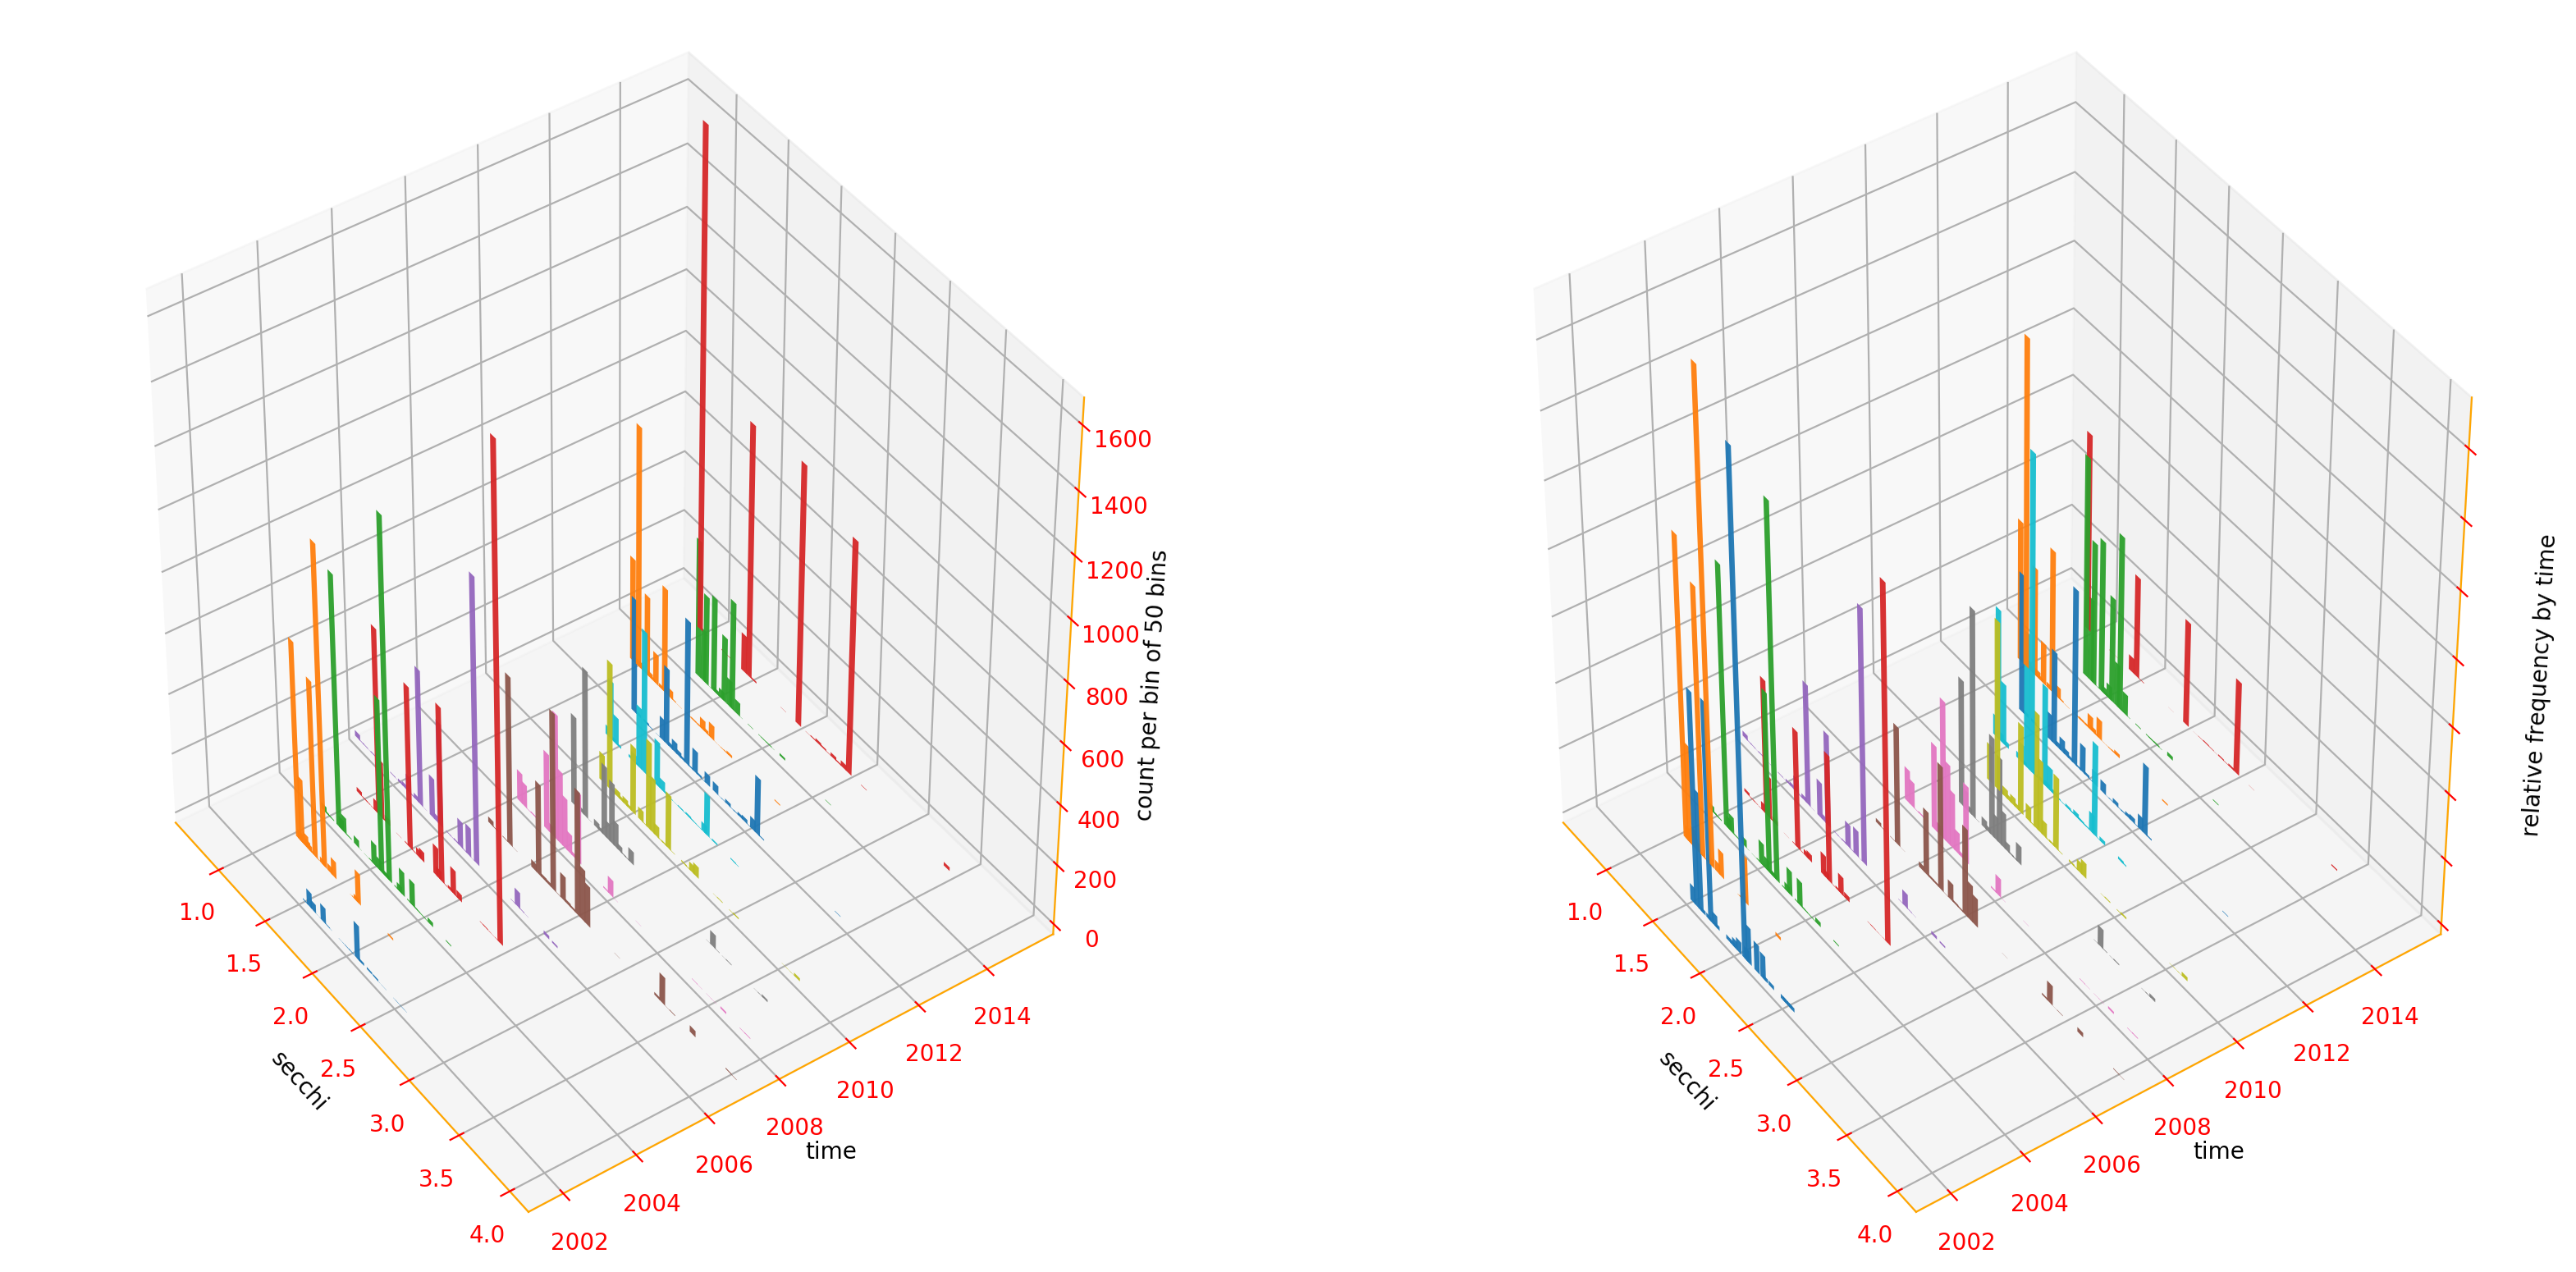

In [11]:
idata_obj.makeTSHistogram(varlist=[TSHistvarlist[3]])

### secchi 

- Observations: 
   - 2015 appears anomalous. nearly everything is in just 4 evenly spaced bins
   - 2005 looks a bit like that too
   - real estate transaction volume (first graph) and the general  macro economy are inversely correlated with secchi depth. cool to see it in the data(easier to see in right side graph)! I could scale and plot the first bar plot on the "floor" of this plot. 
   
   \pagebreak
   
   

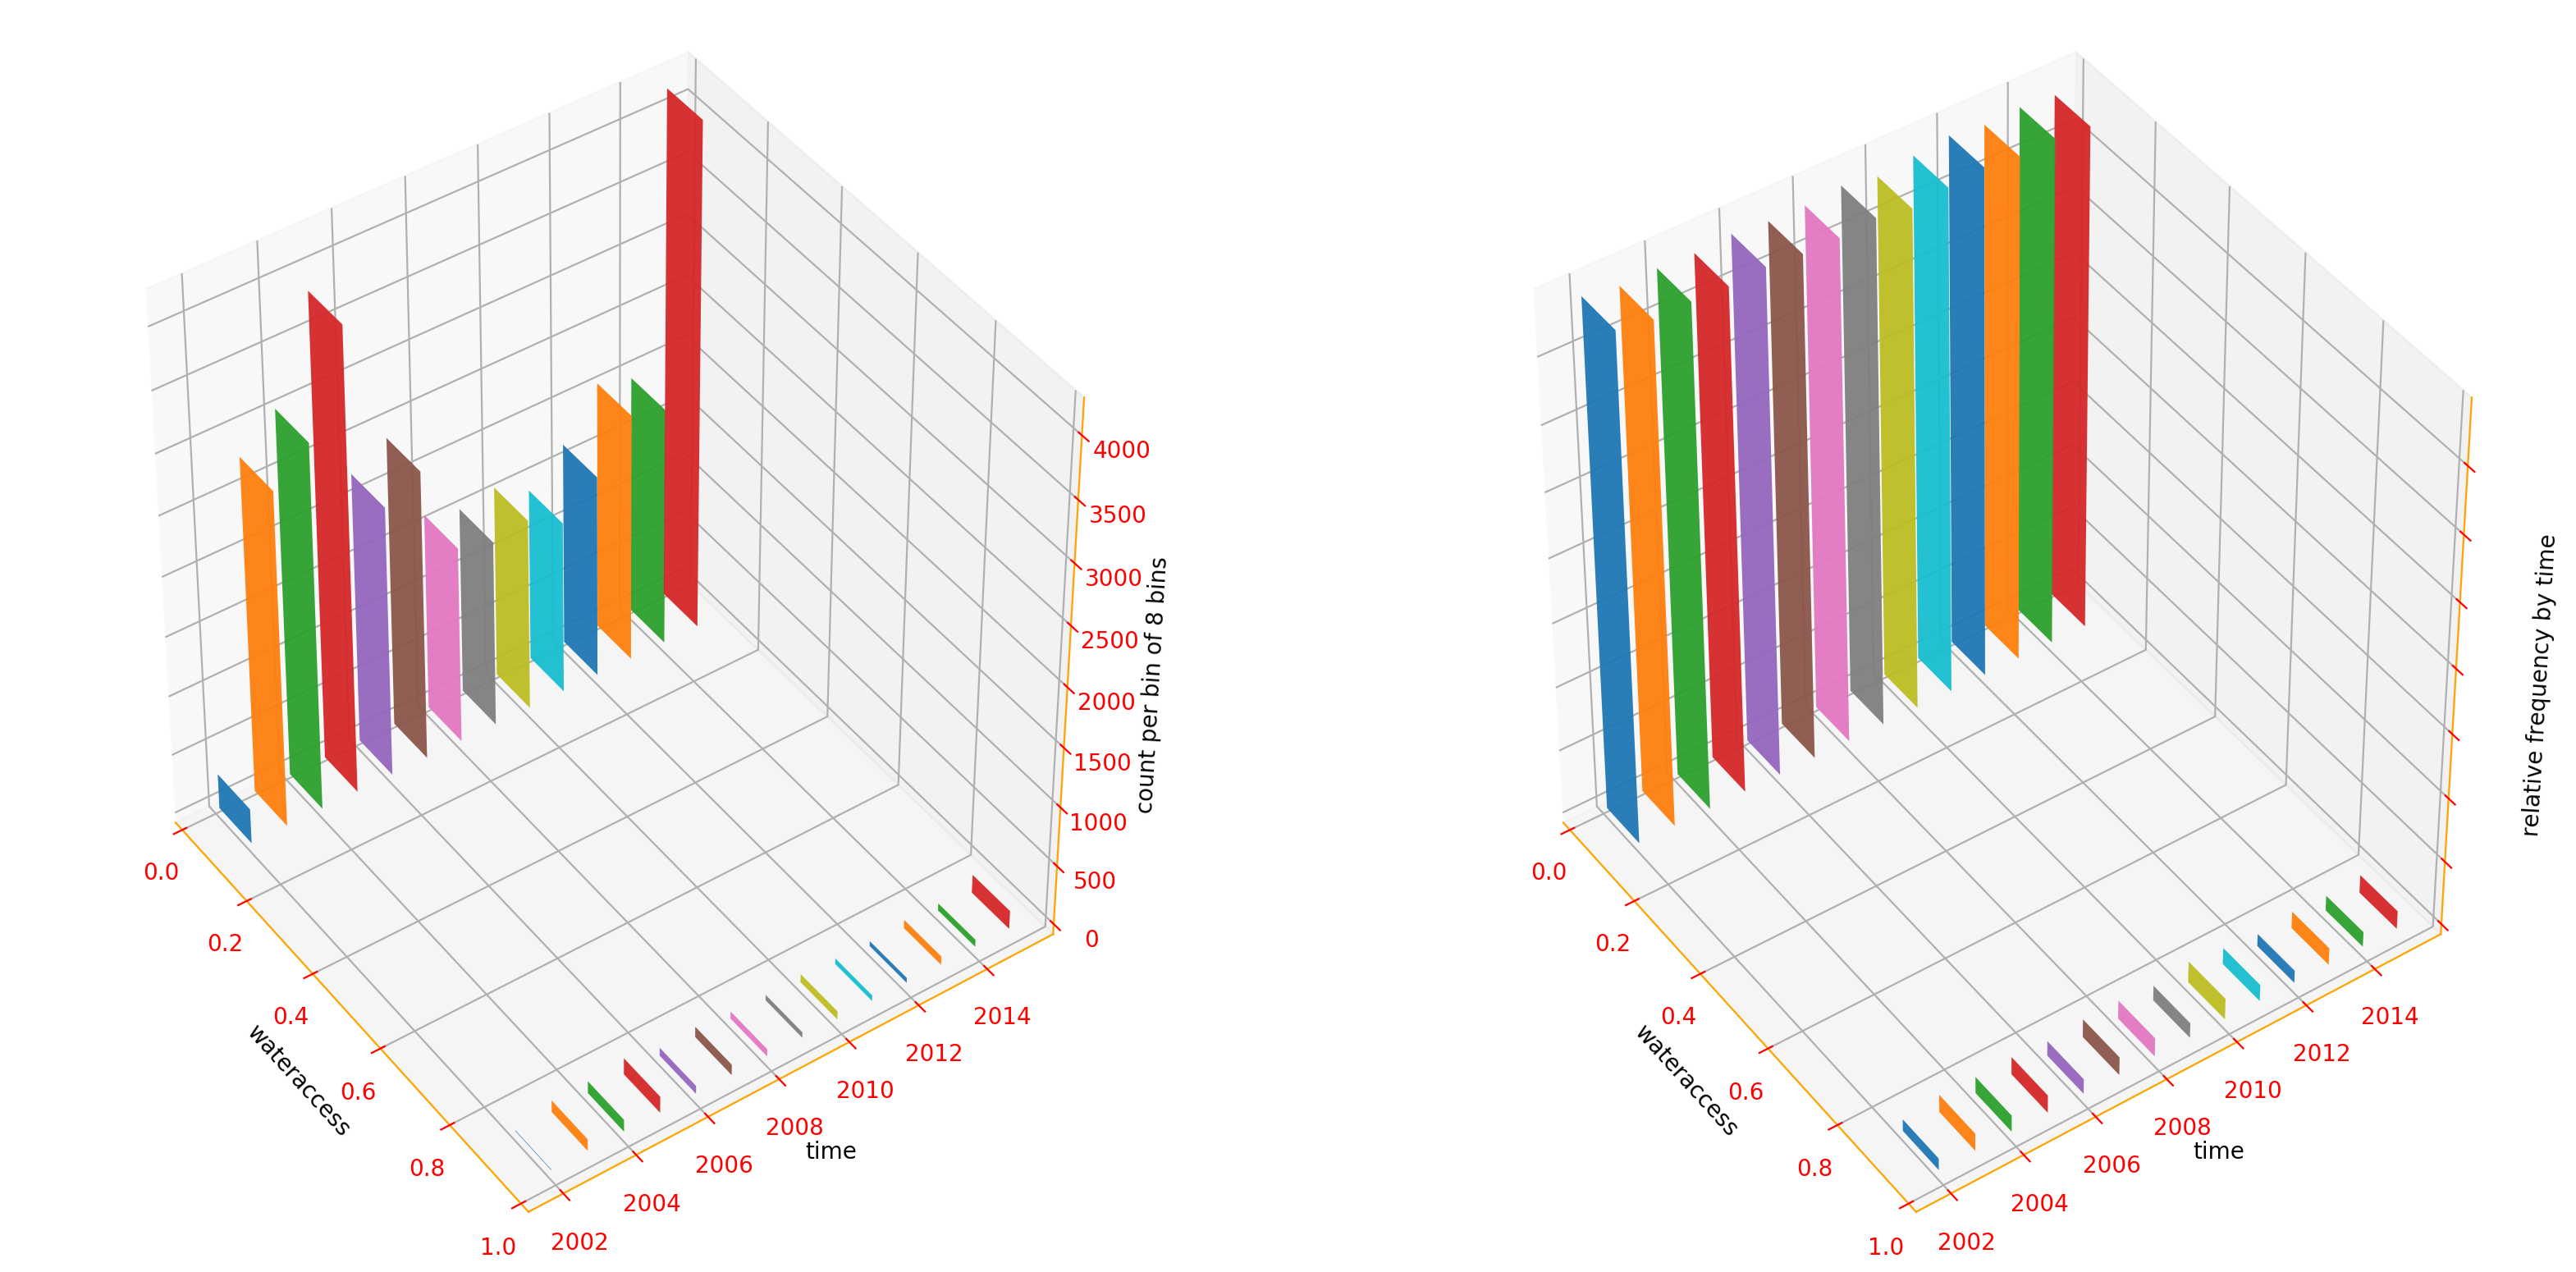

In [12]:
idata_obj.makeTSHistogram(varlist=[TSHistvarlist[4]])

### wateraccess
 
 - Observations:
   - left side graph is not useful due to unequal scale of count across wateraccess, same for next two binary plots below
   - this table makes clear that the numerical discrepancy of the water access variable in table 2 was likely a calculation error for the table and the data is just fine. No obvious pattern other than a small blue bar for the year 2002 (right side graph)
   
   \pagebreak
   
   

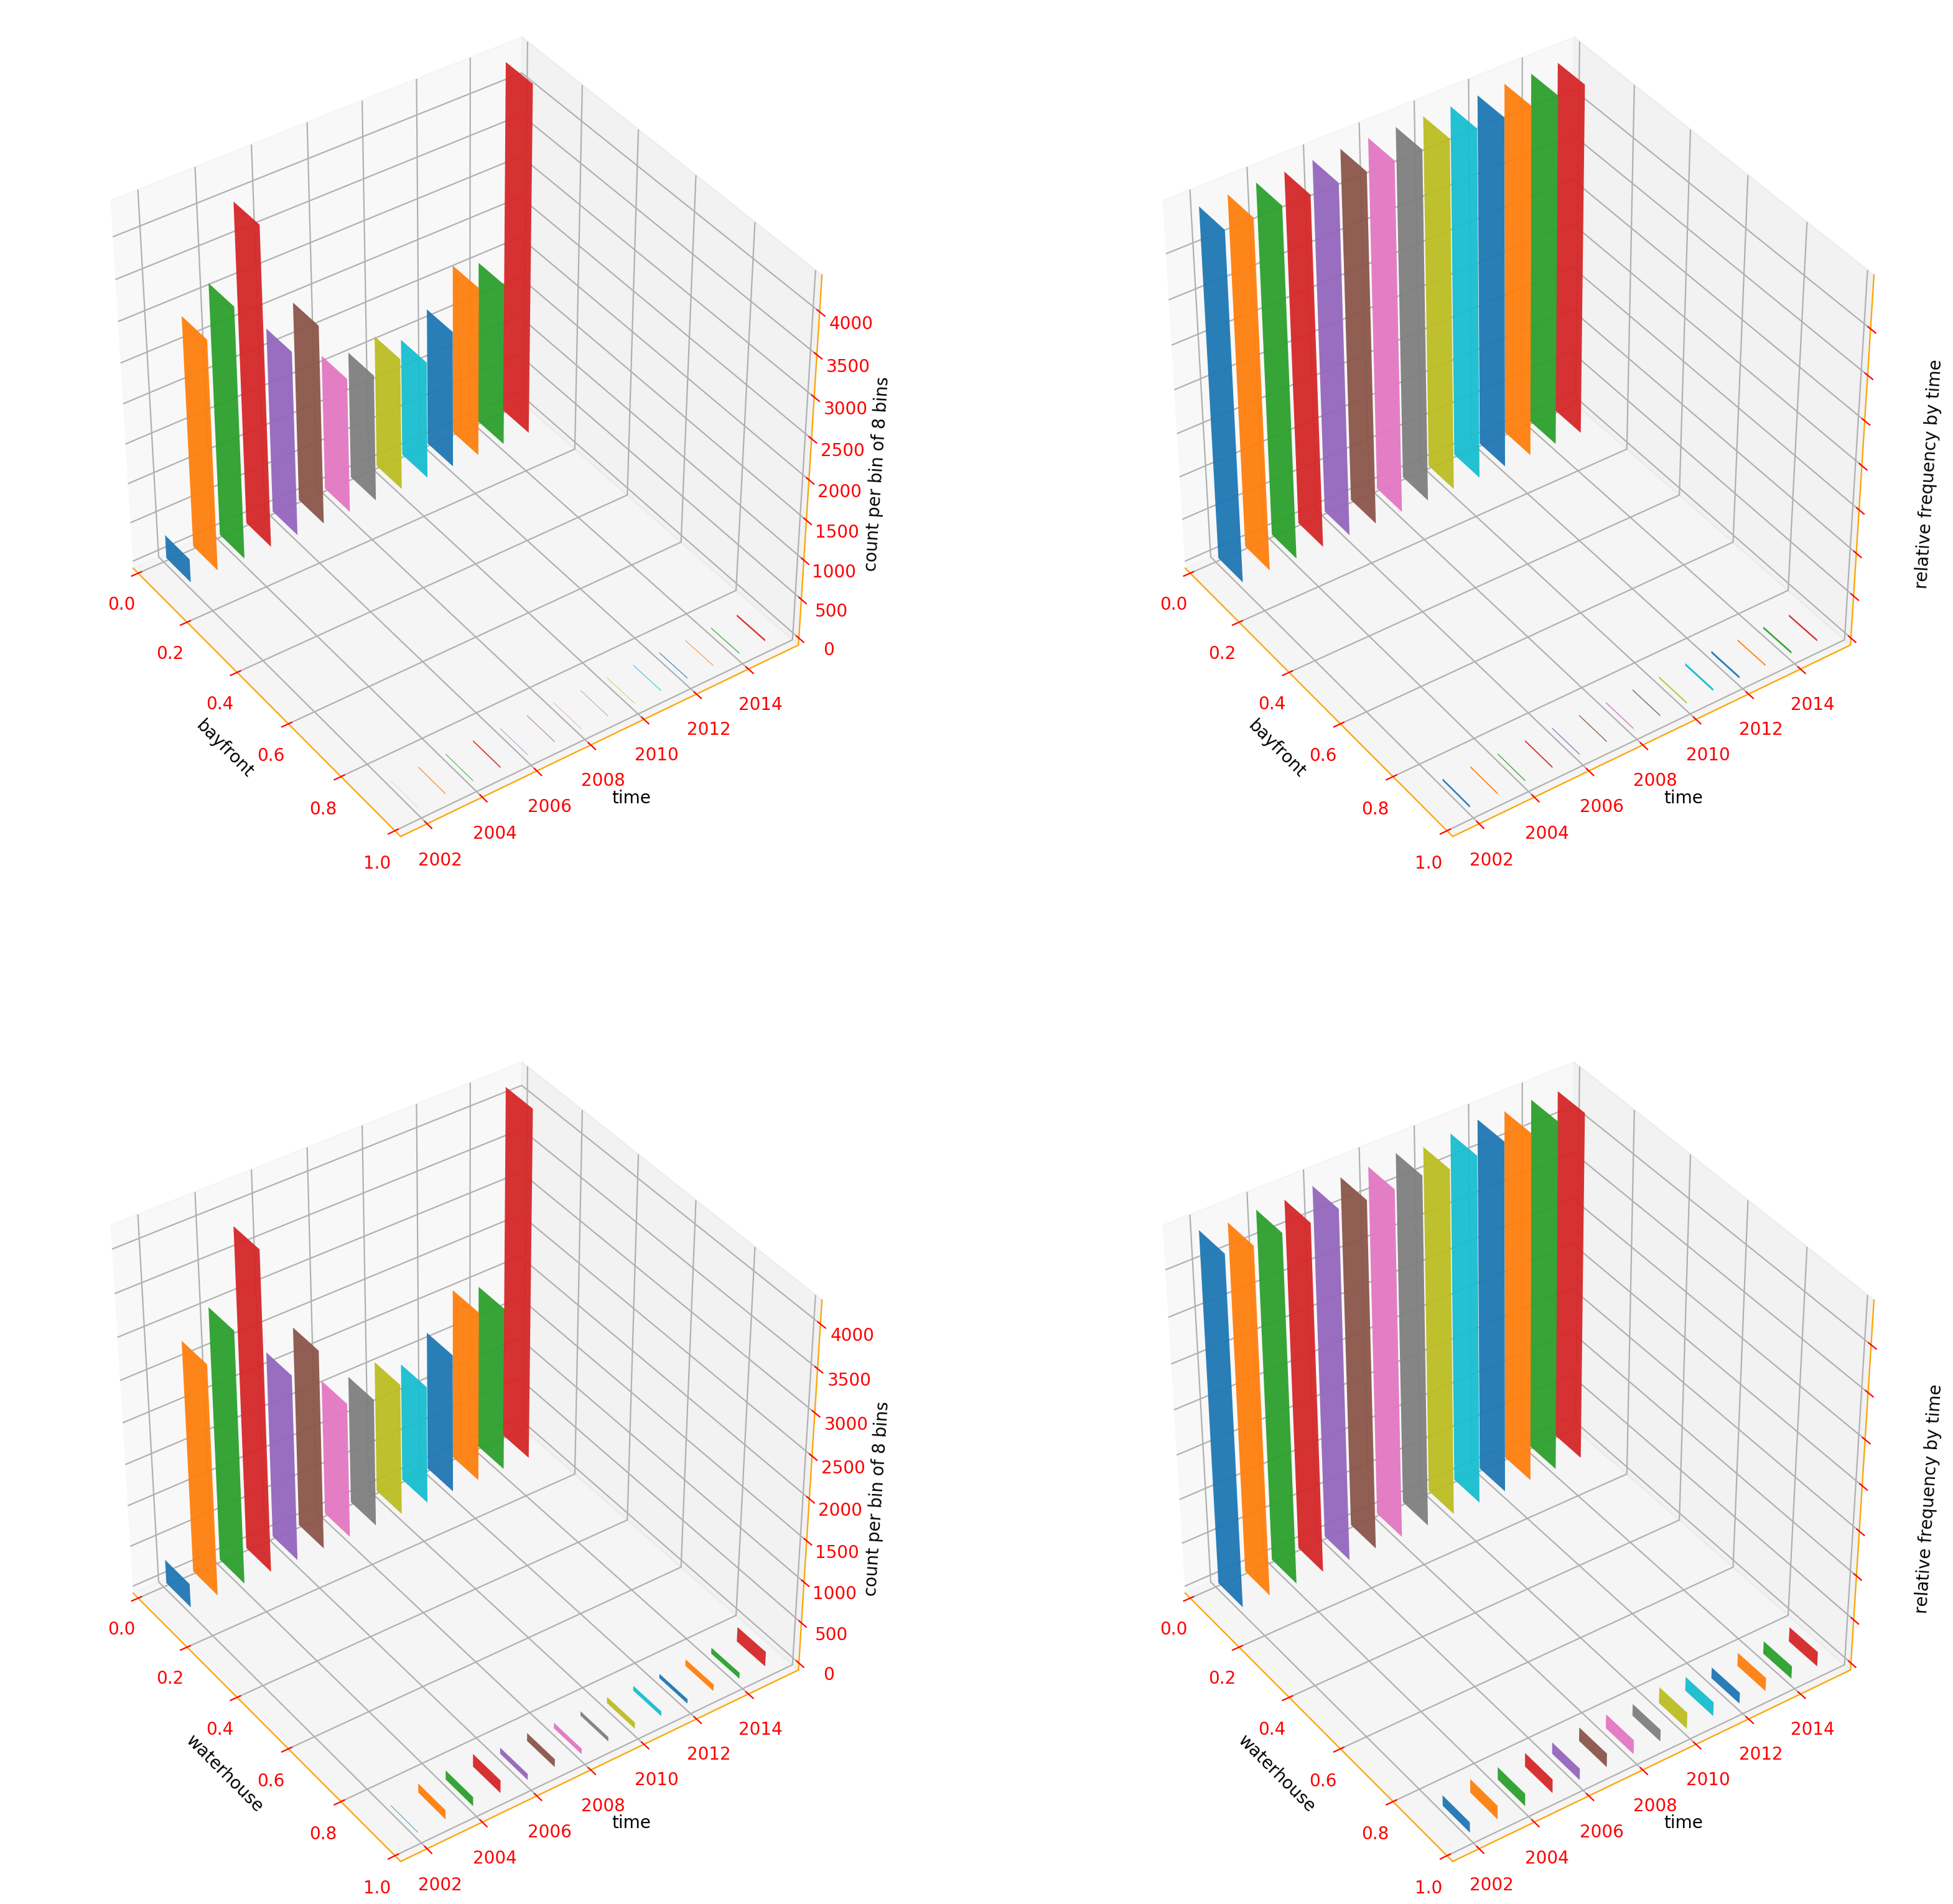

In [13]:
idata_obj.makeTSHistogram(varlist=TSHistvarlist[5:7])

### bayfront and waterhouse

- Observations: 
   - same as above
   
   \pagebreak
   
   

In [ ]:
idata_obj.makeTSHistogram(varlist=TSHistvarlist[7:9])

### shoreline distance (ordinal)

- Observations: 
   - similar to the binary plots, the right side graph is useful for seeing that there is no strong pattern in the sales volume proportions across shoreline distance over time.

In [ ]:
idata_obj.makeTSHistogram(varlist=TSHistvarlist[9:10])

### Sale Acres

- Observations: 
   - see sale acres doc.

In [ ]:
baseyear=2015
idata_obj.addRealByCPI(to_year=baseyear)
cpi_before_after_varlist=[]
for var in idata_obj.dollarvars:
    cpi_before_after_varlist.extend([var,var+f'_real-{baseyear}'])

## time series histograms

### dollar values
#### for this graph and the graphs below:

the graph on the left is 

In [ ]:
idata_obj.makeTSHistogram(varlist=cpi_before_after_varlist[0:2])

## time series histograms
***Zoom in to see detail***

### dollar values
#### for this graph and the graphs below:

The top pair of graphs are created with unadjusted or nominal dollar values. The pair of graphs below it are adjusted to 2015 dollars. oAnd as before, the graph on the right is normalized each year and the graph on the left is not. 
In general, the inflation adjustment doesn't have much of an affect on the graphs.

In [ ]:
idata_obj.makeTSHistogram(varlist=cpi_before_after_varlist[2:4])

### assessed value 

- Observations: 
   - the two graphs on the right are noticeably different. 

In [ ]:
idata_obj.makeTSHistogram(varlist=cpi_before_after_varlist[4:6])